Inferential statistics deals with making statements about the population distribution given that a sample is drawn from the population. The workflow typically goes like this:

- Draw a sample $x$ of size $n$ from the population.
- Compute sample statistics like the sample mean $\bar{x}$ and variance $s_{x}$.
- Make a probabilistic statement regarding the population mean.

The following block will create a population that we can later draw from.

In [214]:
# Imports used by the rest of the notebook
import numpy as np
import pandas as pd
import plots
import math
from matplotlib import pyplot as plt

# Generating a Population

$N$ is the number of elements in a population.</br>
$\mu$ is the population mean.</br>
$\sigma^2$ is the population variance.</br>
$\sigma$ is the population standard deviation.

In [215]:
# Create a population of 1 million heights in cm with known mean and variance.
# This data set will be used for simulations.
mu = 175
sigma = 15
N = 1000000
population = np.random.randn(N) * sigma + mu
mu = np.mean(population)  # population mean
sigma = np.std(population, ddof=0)  # population standard deviation
print("Population mean = " + str(round(mu, 2)))
print("Population standard deviation = " + str(round(sigma, 2)))
print(
    "Population range = ["
    + str(round(min(population), 2))
    + ","
    + str(round(max(population), 2))
    + "]"
)
df_pop = pd.DataFrame(population, columns=["height"])

Population mean = 175.0
Population standard deviation = 15.02
Population range = [102.29,246.99]


# Drawing a Sample

$n$ is the sample size.</br>
$\bar{x}$ is the sample mean.</br>
$s_{x}^2$ is the sample variance.</br>
$s_{x}$ is the sample standard deviation.

In [216]:
# Draw a sample from the population with sample size of n. The sample
# mean is our best point estimate of the population mean mu.
n = 20
x = np.random.choice(population, size=n)
df_samp = pd.DataFrame(x, columns=["height"])
x_bar = round(np.mean(x), 2)  # sample mean
s_x = round(np.std(x, ddof=1), 2)  # sample standard deviation
print("Sample mean = " + str(round(x_bar, 2)))
print("Sample standard deviation = " + str(round(s_x, 2)))
print("")

Sample mean = 174.49
Sample standard deviation = 15.06



# Variations in Sampling Distribution

Running the previous code block again and again will result in different sample means. Sample means can vary between samples. If we take 5 samples and calculate the sample means, they will all be slightly different.

In [217]:
# Draw multiple samples and observe variation
n_samp = 10 # number of samples to draw
ls = []
for i in range(0, 10):
    x = np.random.choice(population, size=n)
    print(f"sample{i} mean = {round(np.mean(x), 2)}, std = {round(np.std(x, ddof=1), 2)}")

sample0 mean = 174.76, std = 10.5
sample1 mean = 180.6, std = 15.28
sample2 mean = 173.8, std = 15.58
sample3 mean = 176.09, std = 13.56
sample4 mean = 178.99, std = 17.55
sample5 mean = 176.24, std = 14.83
sample6 mean = 175.59, std = 16.89
sample7 mean = 174.73, std = 14.41
sample8 mean = 172.19, std = 14.2
sample9 mean = 176.51, std = 16.11


The natural question is, how do multiple sample means vary with regards to the population mean?

It turns out that sample means can be thought of as belonging to a sampling distribution whose mean is the population mean and whose standard deviation = $\frac{\sigma}{\sqrt{n}}$.

The standard deviation of the sampling distribution of sample means is called the **standard error** of the sample mean.
$$ \mathrm{SE}\left(\bar{x}\right) = \frac{\sigma}{\sqrt{n}}$$

It gives us an idea of how sample means vary around the true population mean. The sample mean can be thought of as a value taken from the sampling distribution.

# Creating the Sampling Distribution

In practice, it is impossible to repeatedly sample a population with the sole purpose of creating its sampling distribution as we do here.

Furthermore, the population variance $\sigma^2$ is usually not known when calculating the standard error of the sample mean. This is known here because this is a a simulation. However, when the sample size, $n$, is greater than or equal to 30, the sampling distribution is approximately normal and the standard deviation of the sample can be used in place of the population standard deviation.

In [218]:
n_samp = 100000 # Draw this many samples of size n. Note that as this increases, the mean of the sampling distribution varies around mu less.
x_bars = list()
for i in range(n_samp):
    x = np.random.choice(population, size=n)
    x_bars.append(np.mean(x))
x_bars = np.array(x_bars) # Create numpy array from Python list
df_samp = pd.DataFrame(x, columns=["height"]) # Dataframe of a single sample for later use
df_samp_dist = pd.DataFrame(x_bars, columns=["height"]) # Dataframe of sample means
std_samp_dist = round(np.std(x_bars), 2) # standard deviation of sample means
std_samp_dist_calc = round(sigma / (np.sqrt(n)), 2) # computed standard deviation of sample means from population standard deviation
std_samp_est = round(np.std(x, ddof=1) / np.sqrt(n), 4) # estimate of the sampling distribution's standard deviation from a single sample
print(f"Sampling distribution mean = {round(np.mean(x_bars), 2)}")
print(f"Sampling distribution std = {std_samp_dist}")
print(f"Sampling distribution std calculated = {std_samp_dist_calc}")
print(f"Sampling distribution std estimate = {std_samp_est}")

Sampling distribution mean = 175.0
Sampling distribution std = 3.36
Sampling distribution std calculated = 3.36
Sampling distribution std estimate = 2.5592


Note that the standard deviation of the sampling distribution `std_samp_dist_calc` calculated based on the population standard deviation is quite close to the actual standard deviation of sample means `std_samp_dist`.

# Visualizing the Population vs Sampling Distributions

In [219]:
def pdfnorm(x, mu, sigma):
    """
    Probability density function of the normal distribution
    """
    return (
        1 / (math.sqrt(2 * math.pi) * sigma) * np.exp(-((x - mu) ** 2) / (2 * sigma**2))
    )

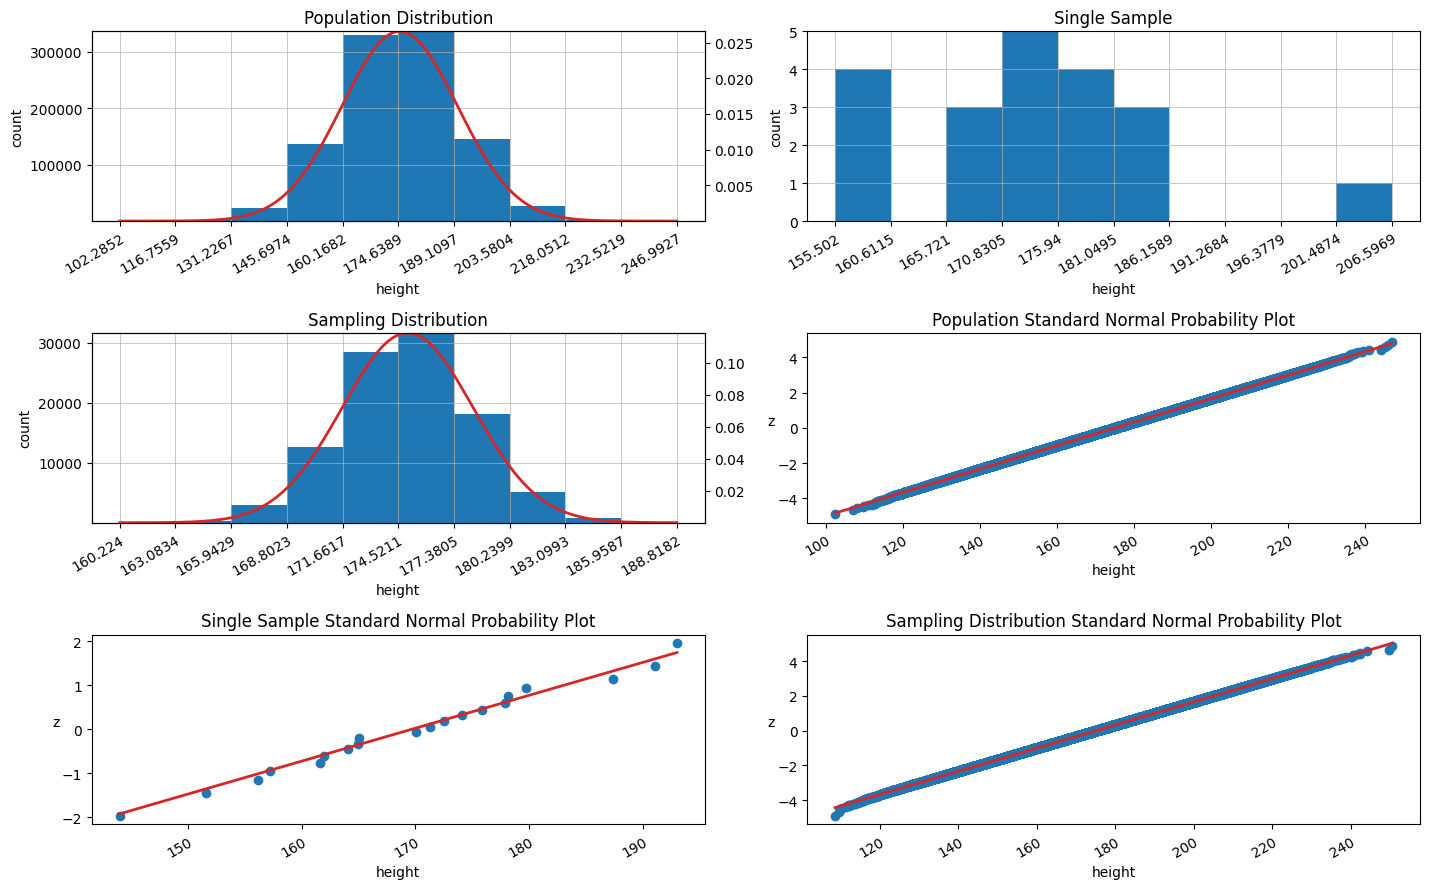

In [238]:
n_bins = 10  # number of bins in histograms
fig_wdt = 14.4  # width of figure in inches
n_row = 3  # number of subplot rows
n_col = 2  # number of subplot columns
n_plot = 0  # current plot number

# create single figure with subplots for all plots
fig = plt.figure()
fig.set_size_inches(fig_wdt, fig_wdt / 1.6)

# histogram of population
n_plot += 1; ax = fig.add_subplot(n_row, n_col, n_plot)
plots.histogram(
    df_pop,
    fig=fig,
    ax=ax,
    numBins=n_bins,
    title="Population Distribution",
    xlabel=["height"],
    ylabel=["count"],
)

# create array of x values for calculating pdf values
xmin = df_pop.loc[:, "height"].min()
xmax = df_pop.loc[:, "height"].max()
x = np.linspace(xmin, xmax, 500)

# plot normal probability density function with population mean and variance
pdf = pdfnorm(x, mu, sigma)
ax = ax.twinx()
plots.scatter(
    x,
    pdf,
    fig=fig,
    ax=ax,
    ylim=(pdf.min(), pdf.max()),
    title="",
    markersize=0,
    linewidth=2,
    color=plots.RED,
)

# histogram of sample
n_plot += 1; ax = fig.add_subplot(n_row, n_col, n_plot)
plots.histogram(
    df_samp,
    fig=fig,
    ax=ax,
    numBins=numBins,
    title="Single Sample",
    xlabel=["height"],
    ylabel=["count"],
)

# histogram of sampling distribution
n_plot += 1; ax = fig.add_subplot(n_row, n_col, n_plot)
plots.histogram(
    df_samp_dist,
    fig=fig,
    ax=ax,
    numBins=n_bins,
    title="Sampling Distribution",
    xlabel=["height"],
    ylabel=["count"],
)

# plot normal probability density function with  mean and variance
# of sampling distribution
xmin = df_samp_dist.loc[:, "height"].min()
xmax = df_samp_dist.loc[:, "height"].max()
x = np.linspace(xmin, xmax, 500)
pdf = pdfnorm(x, x_bars.mean(), std_samp_dist)
ax = ax.twinx()
plots.scatter(
    x,
    pdf,
    fig=fig,
    ax=ax,
    ylim=(pdf.min(), pdf.max()),
    title="",
    markersize=0,
    linewidth=2,
    color=plots.RED,
)

# normal probability plot of population distribution
n_plot += 1; ax = fig.add_subplot(n_row, n_col, n_plot)
plots.probplot(
    df_pop, fig=fig, ax=ax, title="Population Standard Normal Probability Plot"
)

# normal probability plot of the sample
n_plot += 1; ax = fig.add_subplot(n_row, n_col, n_plot)
plots.probplot(
        dfSamp, fig=fig, ax=ax, title="Single Sample Standard Normal Probability Plot"
)

# normal probability plot of sample means
n_plot += 1; ax = fig.add_subplot(n_row, n_col, n_plot)
plots.probplot(
        dfPop,
        fig=fig,
        ax=ax,
        title="Sampling Distribution Standard Normal Probability Plot",
)

- Note that the shape of the population distribution is normal.
- Note that the shape of the sampling distribution is normal. It is also centered around the population mean and it has a smaller variance. In other words, the spread is much less and the sampling distribution appears "tighter" than the population distribution.
- Note that the distribution of the individual sample may not be normal based on the normal probability plots. What is important is that the sampling distribution is normal.

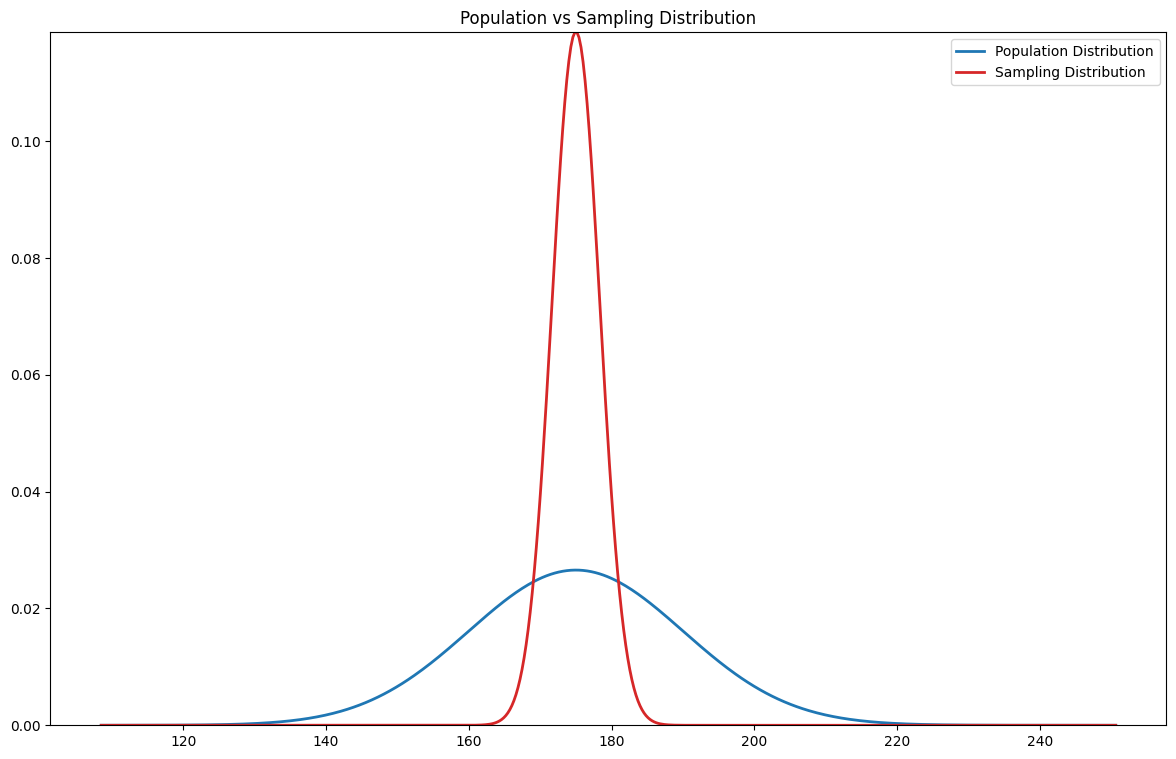

In [240]:
# Comparison of Population and Sampling Distributions

xmin = dfPop.loc[:, "height"].min()
xmax = dfPop.loc[:, "height"].max()
x = np.linspace(xmin, xmax, 500)
ypop = pdfnorm(x, mu, sigma)
fig, ax = plots.scatter(
    x,
    ypop,
    ylim=(ypop.min(), ypop.max()),
    title="",
    markersize=0,
    linewidth=2,
    color=plots.BLUE,
)
ysamp = pdfnorm(x, x_bars.mean(), std_samp_dist_calc)
fig, ax = plots.scatter(
    x,
    ysamp,
    fig=fig,
    ax=ax,
    ylim=(ysamp.min(), ysamp.max()),
    title="Population vs Sampling Distribution",
    markersize=0,
    linewidth=2,
    color=plots.RED,
)
ax.legend(["Population Distribution", "Sampling Distribution"])